In [36]:
from scipy.stats import norm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
import statsmodels.api as sm


In [37]:
df=pd.read_csv("C:\\Users\\ozlem\\OneDrive\\Masaüstü\\kodluyoruz\\2.hafta\\titanik\\titanik\\hmelq.csv")
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
0,0,81200,18834.0,108355.0,HomeImp,NaN,28.0,0.0,0.0,139.14,0.0,14.0,34.042
1,0,12600,103960.0,127384.0,DebtCon,NaN,2.0,0.0,0.0,129.02,0.0,25.0,34.479
2,0,18000,46865.0,61266.0,DebtCon,NaN,5.0,0.0,0.0,102.59,2.0,9.0,26.354
3,0,10300,57676.0,71027.0,DebtCon,NaN,19.0,0.0,0.0,157.52,1.0,11.0,33.992
4,0,9400,56508.0,78358.0,DebtCon,NaN,17.0,0.0,0.0,141.93,0.0,11.0,32.327


In [38]:
data=df.dropna()
data.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [39]:
data.isnull().values.any()

False

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


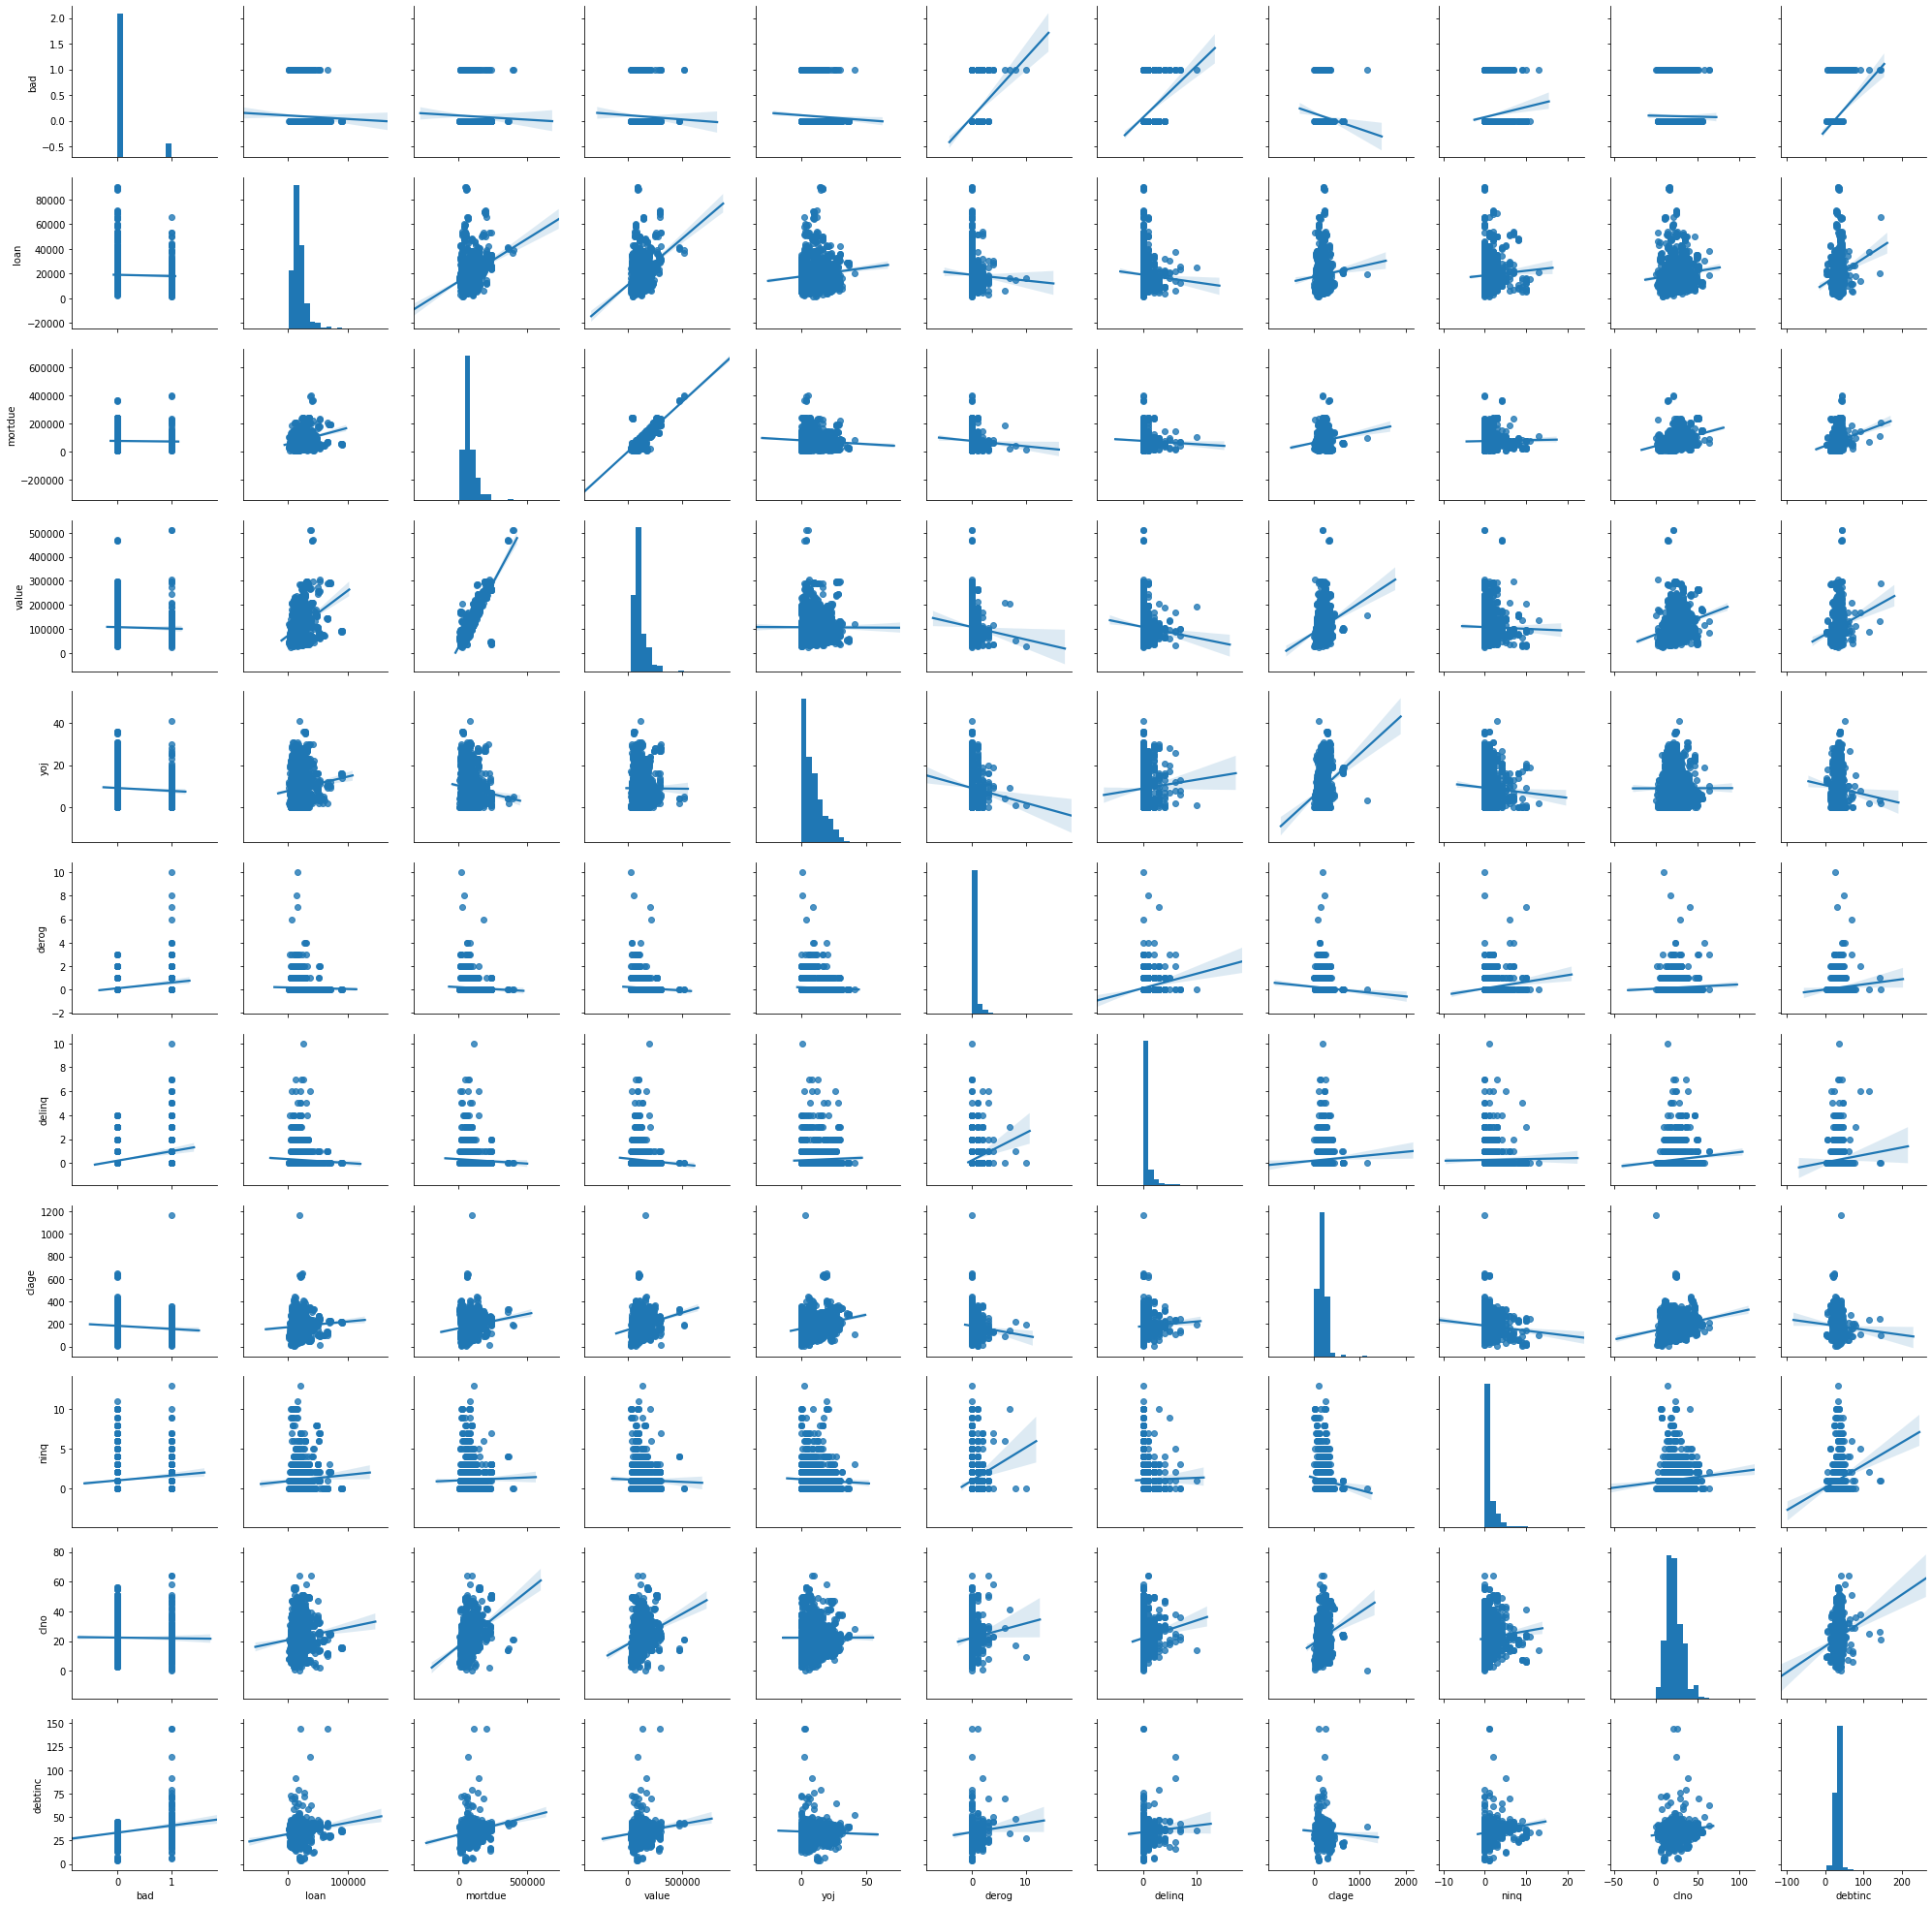

In [41]:
sns.pairplot(data,kind="reg")

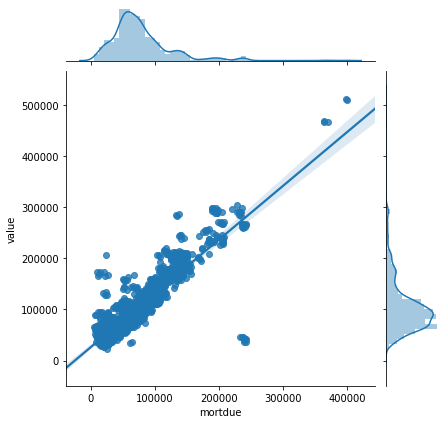

In [42]:
sns.jointplot(x="mortdue",y="value",data=data,kind="reg")

çizilen değer: mortdue


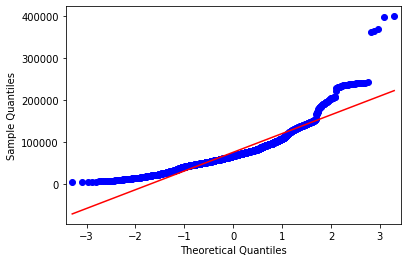

çizilen değer: value


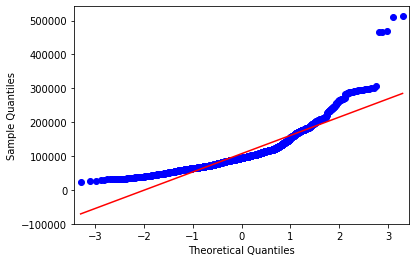

In [43]:
import statsmodels.api as sm
import pylab
dizi=["mortdue","value"]
for i in dizi:
    print("çizilen değer:",i)
    sm.qqplot(data[i],line="s")
    pylab.show()

In [44]:
X=data[["mortdue"]]
X[0:5]

,mortdue
153,94727.0
154,79240.0
155,241931.0
156,62989.0
157,25859.0


In [45]:
X=sm.add_constant(X)
X[0:5]

C:\Users\ozlem\Anaconda3\envs\tensorflow\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,mortdue
153,1.0,94727.0
154,1.0,79240.0
155,1.0,241931.0
156,1.0,62989.0
157,1.0,25859.0


In [46]:
y=data["value"]
y[0:5]

153    136877.0
154     96784.0
155     36486.0
156     76718.0
157     43684.0
Name: value, dtype: float64

In [47]:
lm=sm.OLS(y,X)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     6124.
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:52:54   Log-Likelihood:                -23445.
No. Observations:                2018   AIC:                         4.689e+04
Df Residuals:                    2016   BIC:                         4.691e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.647e+04   1189.449     22.253      0.000    2.41e+04    2.88e+04
mortdue        1.0536      0.013     78.255      0.000       1.027       1.080
==============================================================================
Omnibus:                     1280.135   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            80637.624
Skew:                          -2.245   Prob(JB):                         0.00
Kurtosis:                      33.641   Cond. No.                     1.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
import statsmodels.formula.api as smf
lm=smf.ols("value~mortdue",data)
model=lm.fit()
model.summary()
model.params#model parametrelerini getirir
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.647e+04,1189.449,22.253,0.000,2.41e+04,2.88e+04
mortdue,1.0536,0.013,78.255,0.000,1.027,1.080


In [49]:
model.conf_int()
model.f_pvalue
print("f_pvalue:","%.4f"% model.f_pvalue)
print("fvalue:","%.2f" % model.fvalue)
print("tvalue:","%.2f" % model.tvalues[0:1])

f_pvalue: 0.0000
fvalue: 6123.78
tvalue: 22.25


In [50]:
model.rsquared_adj

0.7522046086077611

In [51]:
model.fittedvalues[0:5]

153    126275.218545
154    109957.856961
155    281371.808888
156     92835.532230
157     53714.744755
dtype: float64

In [52]:
#### sklearn ile regresyon
from sklearn.linear_model import LinearRegression
X=data[["mortdue"]]
y=data["value"]
reg=LinearRegression()
model=reg.fit(X,y)
print(model.intercept_)#beta0
print(model.coef_)

26469.270924685552
[1.05361668]


In [53]:
from sklearn.metrics import mean_squared_error,r2_score
lm=smf.ols("value~mortdue",data)
model=lm.fit()
model.summary()
mse=mean_squared_error(y,model.fittedvalues)
mse

722569435.9837799

In [54]:
k_t=pd.DataFrame({"gercek_y":y[0:10],"tahmin_y":reg.predict(X)[0:10]})
k_t  
k_t["hata"] =k_t["gercek_y"] - k_t["tahmin_y"]  
k_t    
k_t["hata_kare"] =k_t["hata"]**2  #hatanın kresini al
k_t  
print(np.sum(k_t["hata_kare"]))
print(np.mean(k_t["hata_kare"]))
print(np.sqrt(np.mean(k_t["hata_kare"])))

60812266149.75379
6081226614.975379
77982.21986437279


153     10601.781455
154    -13173.856961
155   -244885.808888
156    -16117.532230
157    -10030.744755
158      9211.807051
159     -3575.453030
160      4766.920970
161     -5800.790092
162      6546.284240
dtype: float64


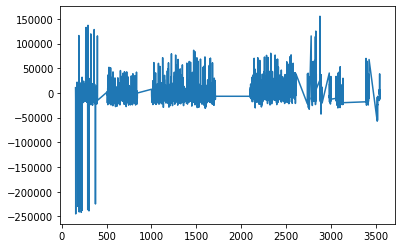

In [55]:
print(model.resid[0:10])
plt.plot(model.resid)

C:\Users\ozlem\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\ozlem\Anaconda3\envs\tensorflow\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


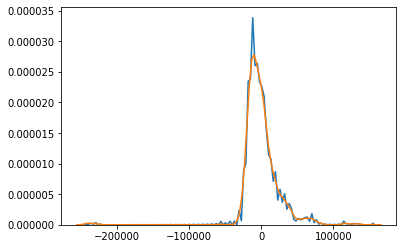

In [56]:
advres=pd.concat([data,pd.Series(model.resid,name="resid"),pd.Series(model.predict(),name="predict")],axis=1)
sns.kdeplot(np.array(advres.resid),bw=10)#normalinden gelen plot değeri kde plot tır
sns.distplot(np.array(advres.resid),hist=False)

In [57]:
data.drop(['reason','job'],inplace = True,axis = 1)

C:\Users\ozlem\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [58]:
from patsy import dmatrices#tüm dataya burda baktı 
from statsmodels.stats.outliers_influence import variance_inflation_factor
lm=smf.ols("value~mortdue+derog+delinq+debtinc+ninq+clage+clno+yoj",data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  value   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     842.5
Date:                Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                        12:52:56   Log-Likelihood:                -23369.
No. Observations:                2018   AIC:                         4.676e+04
Df Residuals:                    2009   BIC:                         4.681e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.533e+04   2920.636      8.671      0.000    1.96e+04    3.11e+04
mortdue        1.0847      0.014     76.192      0.000       1.057       1.113
derog        987.3980   1027.557      0.961      0.337   -1027.791    3002.587
delinq     -1875.9946    749.353     -2.503      0.012   -3345.586    -406.404
debtinc      -78.0924     71.275     -1.096      0.273    -217.872      61.687
ninq        -795.9776    376.266     -2.115      0.035   -1533.889     -58.066
clage         49.2158      7.241      6.797      0.000      35.015      63.417
clno        -461.5115     66.876     -6.901      0.000    -592.665    -330.359
yoj          443.1890     79.046      5.607      0.000     288.168     598.210
==============================================================================
Omnibus:                     1196.503   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            70243.025
Skew:                          -2.038   Prob(JB):                         0.00
Kurtosis:                      31.614   Cond. No.                     4.47e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.47e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""